In [227]:
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [228]:
dict = np.load('ensemble_dictionaries/ensemble_proper_linear_Lorentz_001_latest.npy', allow_pickle=True).item()
lead_times = dict['lead_times']
original_sequence = dict['original_sequences']
observation_answers = dict['observation_answers']
perturbed_initial_conditions = dict['perturbed_initial_conditions']
ML_only_forecast = dict['ML_only_forecast']

In [240]:
c = 1000
imperfect_predictions = dict[c]['imperfect_predictions']
ML_physical_forecast = dict[c]['ML_physical_forecast']
ML_physical_error_forecast = dict[c]['ML_physical_error_forecast']

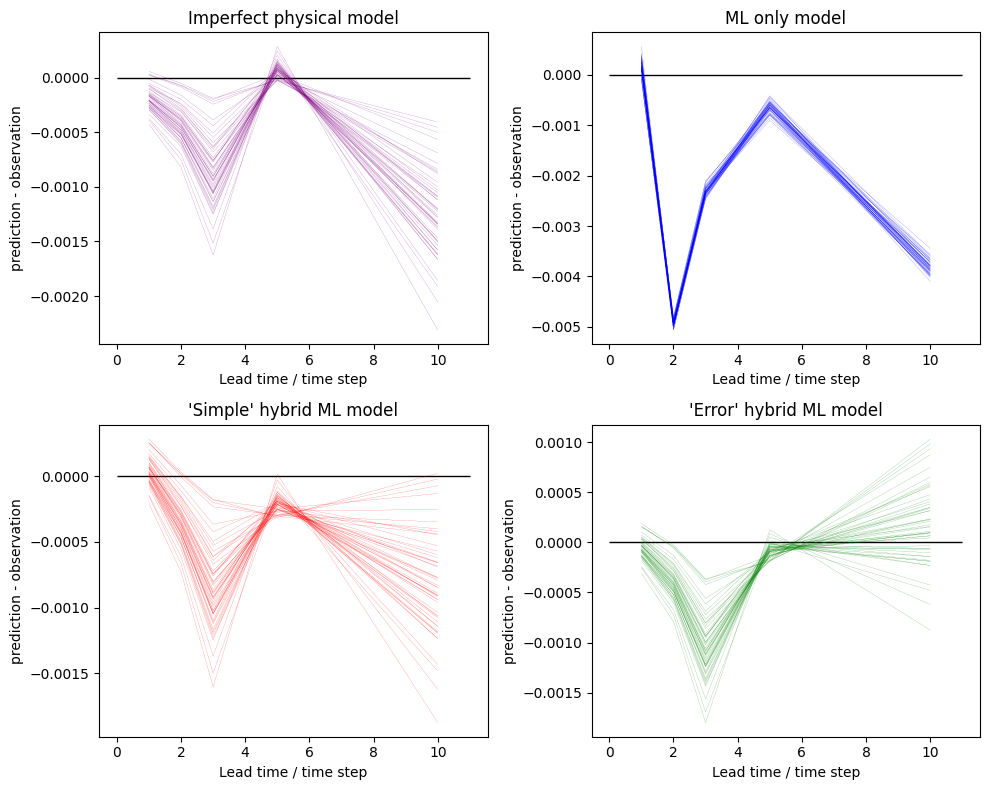

In [257]:
linewidth0 = 1
linewidth1 = 0.1
x_label = 1
num = 0

# plt.hlines(0, 0, lead_times[-1]+1, label = 'observation', color = 'b', linewidth = linewidth0)
# plt.plot(lead_times, observation_answers[:,x_label], '-', label = 'observation', color = 'b', linewidth = linewidth0)
# for i in range(perturbed_initial_conditions.shape[0]):
#     plt.plot(lead_times, imperfect_predictions[i,:,x_label], '-', label = 'imperfect physical predictions', color = 'orange', linewidth = linewidth1)
#     plt.plot(lead_times, ML_only_forecast[i,:,x_label] , '-', label = 'ML only', color = 'purple', linewidth = linewidth1)
#     plt.plot(lead_times, ML_physical_forecast[i,:,x_label] , '-', label = 'ML physical', color = 'r', linewidth = linewidth1)
#     plt.plot(lead_times, ML_physical_error_forecast[i,:,x_label] + imperfect_predictions[i,:,x_label], '-', label = 'ML physical error', color = 'g', linewidth = linewidth1)
# # plt.legend()
# plt.show()

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5, left=0.1, right=0.9, top=0.9, bottom=0.1)

axs[0, 0].hlines(0, 0, lead_times[-1]+1, label = 'observation', color = 'k', linewidth = linewidth0)
for i in range(perturbed_initial_conditions.shape[1]):
    axs[0, 0].plot(lead_times, imperfect_predictions[num, i,:,x_label] - observation_answers[num, :,x_label] , '-', label = 'imperfect physical predictions', color = 'purple', linewidth = linewidth1)
# plt.title('imperfect physical predictions')
axs[0, 0].set_ylabel('prediction - observation')
axs[0, 0].set_xlabel('Lead time / time step')
axs[0, 0].set_title('Imperfect physical model')
# axs[0, 0].savefig('final_ensemble_graphs/example_ensemble_forecast_imperfect')

axs[0, 1].hlines(0, 0, lead_times[-1]+1, label = 'observation', color = 'k', linewidth = linewidth0)
for i in range(perturbed_initial_conditions.shape[1]):
    axs[0, 1].plot(lead_times, ML_only_forecast[num, i,:,x_label] - observation_answers[num, :,x_label], '-', label = 'ML only', color = 'blue', linewidth = linewidth1)
# plt.title('ML only')
axs[0, 1].set_ylabel('prediction - observation')
axs[0, 1].set_xlabel('Lead time / time step')
axs[0, 1].set_title('ML only model')
# plt.savefig('final_ensemble_graphs/example_ensemble_forecast_ML_only')

axs[1, 0].hlines(0, 0, lead_times[-1]+1, label = 'observation', color = 'k', linewidth = linewidth0)
for i in range(perturbed_initial_conditions.shape[1]):
    axs[1, 0].plot(lead_times, ML_physical_forecast[num, i,:,x_label] - observation_answers[num,:,x_label], '-', label = 'ML physical', color = 'r', linewidth = linewidth1)
# plt.title('ML physical')
axs[1, 0].set_ylabel('prediction - observation')
axs[1, 0].set_xlabel('Lead time / time step')
axs[1, 0].set_title('\'Simple\' hybrid ML model')
# plt.savefig('final_ensemble_graphs/example_ensemble_forecast_physical')

axs[1, 1].hlines(0, 0, lead_times[-1]+1, label = 'observation', color = 'k', linewidth = linewidth0)
for i in range(perturbed_initial_conditions.shape[1]):
    axs[1, 1].plot(lead_times, ML_physical_error_forecast[num,i,:,x_label] + imperfect_predictions[num,i,:,x_label]- observation_answers[num,:,x_label], '-', label = 'ML physical error', color = 'g', linewidth = linewidth1)
# plt.title('ML physical error')
axs[1, 1].set_ylabel('prediction - observation')
axs[1, 1].set_xlabel('Lead time / time step')
axs[1, 1].set_title('\'Error\' hybrid ML model')
# plt.savefig('final_ensemble_graphs/example_ensemble_forecast_physical_error')

plt.tight_layout()
plt.savefig('final_ensemble_graphs/example_ensemble_forecasts')
plt.show()

[2.08086878e+11 2.38611197e+11 2.22010867e+11 2.61238707e+11
 2.31788056e+11]
[9.00013719e+10 9.15159260e+10 8.44059458e+10 8.17265087e+10
 7.36458003e+10 5.95901510e+10]
[1.86888914e+11 1.36884001e+11 1.53724620e+11 1.44146819e+11
 1.47548141e+11 1.66881163e+11]
[8.20762226e+10 9.19493824e+10 7.83885129e+10 6.64570351e+10
 6.03868629e+10 8.29918055e+10]


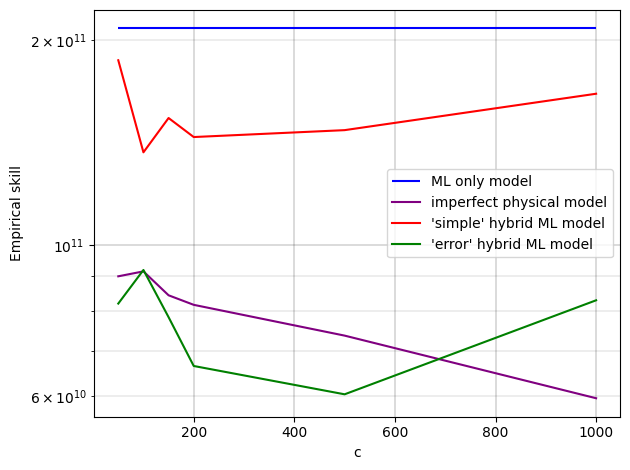

[2.08086878e+11 2.38611197e+11 2.22010867e+11 2.61238707e+11
 2.31788056e+11]
[3.35541434e+11 3.59921558e+11 3.65058588e+11 3.66679210e+11
 3.52644389e+11 3.27425200e+11]
[1.27248301e+11 2.68804225e+11 2.13252237e+11 3.24867685e+11
 4.49146957e+11 2.80107375e+11]
[1.33078104e+11 1.93939790e+11 2.59667187e+11 2.69790179e+11
 3.46799023e+11 3.55919408e+11]


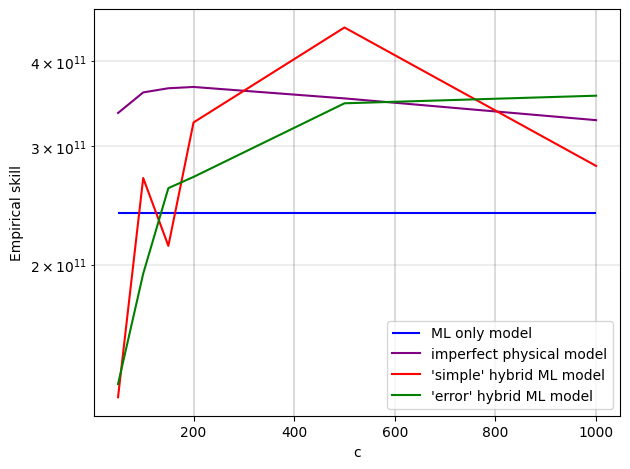

[2.08086878e+11 2.38611197e+11 2.22010867e+11 2.61238707e+11
 2.31788056e+11]
[1.19434894e+12 1.33139320e+12 1.35715111e+12 1.36620025e+12
 1.36696306e+12 1.36382867e+12]
[2.67301695e+11 4.98405728e+11 1.04044266e+12 7.38066276e+11
 8.40204013e+11 8.83103106e+11]
[3.13578289e+11 9.02980276e+11 6.05971646e+11 5.36024251e+11
 8.54015892e+11 5.57106653e+11]


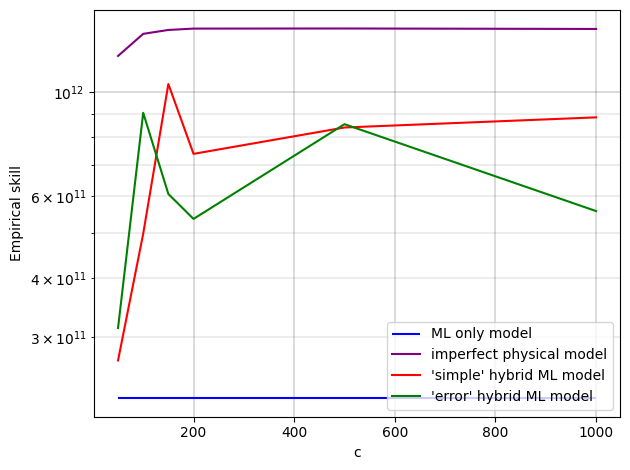

[2.08086878e+11 2.38611197e+11 2.22010867e+11 2.61238707e+11
 2.31788056e+11]
[1.06241304e+13 1.31130297e+13 1.36143280e+13 1.37875375e+13
 1.39710444e+13 1.39968424e+13]
[2.29904529e+11 4.89822167e+11 1.09333496e+12 6.62648448e+11
 1.67334610e+12 6.22362588e+11]
[2.40327949e+11 6.09247558e+11 1.53466612e+12 1.90652528e+12
 3.18668134e+12 2.67663279e+12]


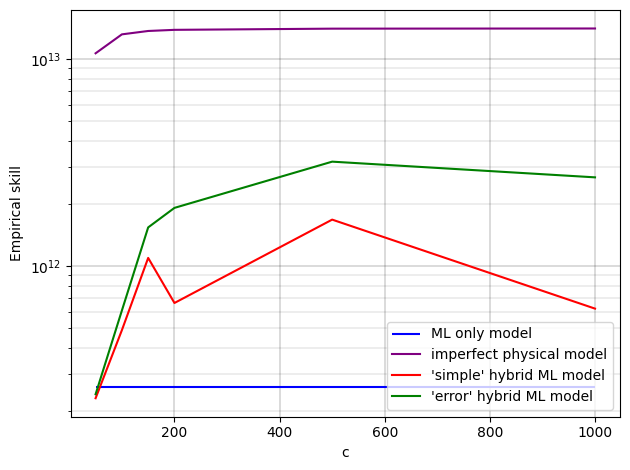

[2.08086878e+11 2.38611197e+11 2.22010867e+11 2.61238707e+11
 2.31788056e+11]
[4.72134916e+13 3.92243709e+13 3.45370463e+13 3.31374914e+13
 3.16216348e+13 3.14138481e+13]
[1.54851680e+11 5.48448568e+11 1.10231378e+12 5.21217954e+11
 2.15882914e+12 7.89521809e+11]
[1.64636424e+11 4.64734978e+11 9.32204980e+11 2.23913493e+12
 1.88723138e+12 1.18265746e+12]


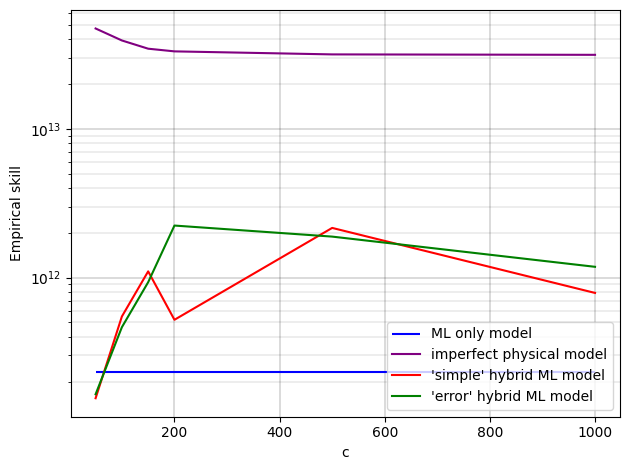

In [258]:
c_array = [30,40,50,60,70,80,90,100,110,120,130,140,150,175,200,225,250,275,300,400,500,600,700,800,900,1000]
c_array = [100,1000]
c_array = [50,100,150,200,500,1000]
score_name = 'proper_linear'
for j, lead_time in enumerate(lead_times):
    print(dict[f'{score_name}_score']['ML_only'])
    plt.hlines(dict[f'{score_name}_score']['ML_only'][j], c_array[0], c_array[-1], label = 'ML only model', color = 'b')

    ignorance_scores_imperfect_physical = np.zeros((len(c_array)))
    ignorance_scores_ML_physical = np.zeros((len(c_array)))
    ignorance_scores_ML_physical_error = np.zeros((len(c_array)))
    for i, c in enumerate(c_array):
        ignorance_scores_imperfect_physical[i] = dict[f'{score_name}_score'][c]['imperfect_physical'][j]
        ignorance_scores_ML_physical[i] = dict[f'{score_name}_score'][c]['ML_physical'][j]
        ignorance_scores_ML_physical_error[i] = dict[f'{score_name}_score'][c]['ML_physical_error'][j]
    print(ignorance_scores_imperfect_physical)
    print(ignorance_scores_ML_physical)
    print(ignorance_scores_ML_physical_error)
    plt.plot(c_array, ignorance_scores_imperfect_physical, label = 'imperfect physical model', color = 'purple')
    plt.plot(c_array, ignorance_scores_ML_physical, label = '\'simple\' hybrid ML model', color = 'r')
    plt.plot(c_array, ignorance_scores_ML_physical_error , label = '\'error\' hybrid ML model', color = 'g')
    plt.grid(which='major', color='black', linestyle='-', linewidth = 0.2)
    plt.grid(which='minor', color='black', linestyle='-', linewidth = 0.1)
    plt.xlabel('c')
    plt.ylabel('Empirical skill')
    plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'final_ensemble_graphs/emperical_skill_score_timesteps{lead_time}', )
    plt.show()